<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.240146,46.740286,22.467536,-0.159065,130.288902,130.231881,0.057021
1,0.0,1.0,34.752390,59.069123,77.143895,0.576764,181.542171,181.166465,0.375707
2,0.0,2.0,25.087503,33.451464,74.732585,-2.086591,141.184961,143.301831,-2.116870
3,0.0,3.0,92.210297,24.178375,97.680969,0.286116,224.355757,223.568415,0.787342
4,0.0,4.0,84.763774,74.153017,61.478703,2.076991,232.472486,230.299673,2.172813
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.451137,27.243042,65.724344,-0.662125,137.756397,138.272587,-0.516190
59996,999.0,56.0,46.873116,65.352143,32.020323,-1.534068,152.711515,153.824044,-1.112529
59997,999.0,57.0,54.952055,84.856321,71.991056,-0.529249,221.270183,222.018217,-0.748034
59998,999.0,58.0,54.743791,92.808855,66.791071,2.599604,226.943320,224.514030,2.429290


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.240146  46.740286  22.467536 -0.159065  130.288902   
      1.0    34.752390  59.069123  77.143895  0.576764  181.542171   
      2.0    25.087503  33.451464  74.732585 -2.086591  141.184961   
      3.0    92.210297  24.178375  97.680969  0.286116  224.355757   
      4.0    84.763774  74.153017  61.478703  2.076991  232.472486   
...                ...        ...        ...       ...         ...   
999.0 55.0   35.451137  27.243042  65.724344 -0.662125  137.756397   
      56.0   46.873116  65.352143  32.020323 -1.534068  152.711515   
      57.0   54.952055  84.856321  71.991056 -0.529249  221.270183   
      58.0   54.743791  92.808855  66.791071  2.599604  226.943320   
      59.0   72.430802  49.233428  93.104247 -0.181435  224.587042   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    130.231881  0.057021  
      1.0    181.166465  0.375707  
      2.0    143.301831 -2.116870  
      3.0    223.568415  0.787342  
      4.0    230.299673  2.172813  
...                 ...       ...  
999.0 55.0   138.272587 -0.516190  
      56.0   153.824044 -1.112529  
      57.0   222.018217 -0.748034  
      58.0   224.514030  2.429290  
      59.0   225.274489 -0.687447  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.240146  46.740286  22.467536 -0.159065  130.288902   
      1.0    34.752390  59.069123  77.143895  0.576764  181.542171   
      2.0    25.087503  33.451464  74.732585 -2.086591  141.184961   
      3.0    92.210297  24.178375  97.680969  0.286116  224.355757   
      4.0    84.763774  74.153017  61.478703  2.076991  232.472486   
...                ...        ...        ...       ...         ...   
999.0 55.0   35.451137  27.243042  65.724344 -0.662125  137.756397   
      56.0   46.873116  65.352143  32.020323 -1.534068  152.711515   
      57.0   54.952055  84.856321  71.991056 -0.529249  221.270183   
      58.0   54.743791  92.808855  66.791071  2.599604  226.943320   
      59.0   72.430802  49.233428  93.104247 -0.181435  224.587042   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    130.231881  0.057021  
      1.0    181.166465  0.375707  
      2.0    143.301831 -2.116870  
      3.0    223.568415  0.787342  
      4.0    230.299673  2.172813  
...                 ...       ...  
999.0 55.0   138.272587 -0.516190  
      56.0   153.824044 -1.112529  
      57.0   222.018217 -0.748034  
      58.0   224.514030  2.429290  
      59.0   225.274489 -0.687447  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.240146,46.740286,22.467536,-0.159065,130.288902,130.231881,0.057021
1,0.0,1.0,34.752390,59.069123,77.143895,0.576764,181.542171,181.166465,0.375707
2,0.0,2.0,25.087503,33.451464,74.732585,-2.086591,141.184961,143.301831,-2.116870
3,0.0,3.0,92.210297,24.178375,97.680969,0.286116,224.355757,223.568415,0.787342
4,0.0,4.0,84.763774,74.153017,61.478703,2.076991,232.472486,230.299673,2.172813
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.451137,27.243042,65.724344,-0.662125,137.756397,138.272587,-0.516190
59996,999.0,56.0,46.873116,65.352143,32.020323,-1.534068,152.711515,153.824044,-1.112529
59997,999.0,57.0,54.952055,84.856321,71.991056,-0.529249,221.270183,222.018217,-0.748034
59998,999.0,58.0,54.743791,92.808855,66.791071,2.599604,226.943320,224.514030,2.429290


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    51.240146  46.740286  22.467536 -0.159065  130.288902   
      1.0    34.752390  59.069123  77.143895  0.576764  181.542171   
      2.0    25.087503  33.451464  74.732585 -2.086591  141.184961   
      3.0    92.210297  24.178375  97.680969  0.286116  224.355757   
      4.0    84.763774  74.153017  61.478703  2.076991  232.472486   
...                ...        ...        ...       ...         ...   
999.0 55.0   35.451137  27.243042  65.724344 -0.662125  137.756397   
      56.0   46.873116  65.352143  32.020323 -1.534068  152.711515   
      57.0   54.952055  84.856321  71.991056 -0.529249  221.270183   
      58.0   54.743791  92.808855  66.791071  2.599604  226.943320   
      59.0   72.430802  49.233428  93.104247 -0.181435  224.587042   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    130.231881  0.057021  
      1.0    181.166465  0.375707  
      2.0    143.301831 -2.116870  
      3.0    223.568415  0.787342  
      4.0    230.299673  2.172813  
...                 ...       ...  
999.0 55.0   138.272587 -0.516190  
      56.0   153.824044 -1.112529  
      57.0   222.018217 -0.748034  
      58.0   224.514030  2.429290  
      59.0   225.274489 -0.687447  

[60000 rows x 7 columns]

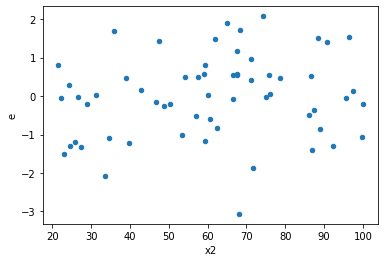

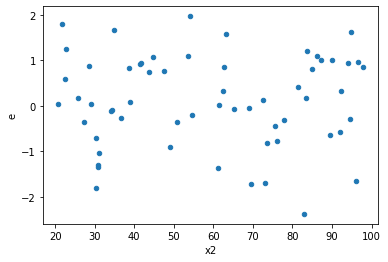

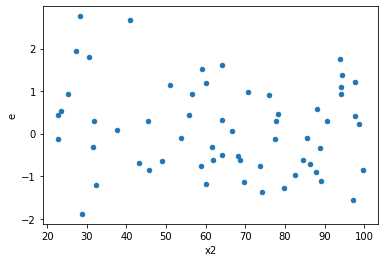

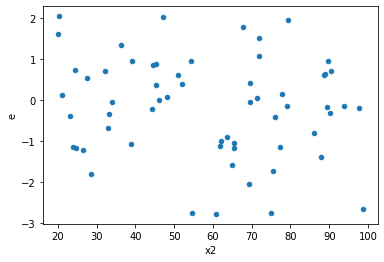

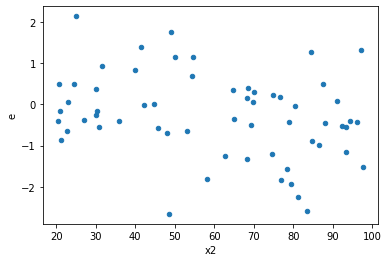

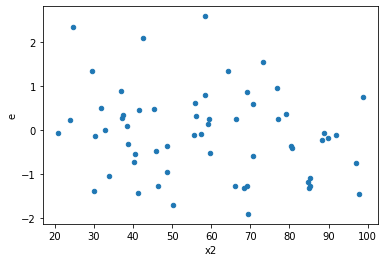

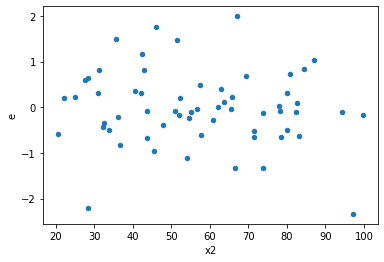

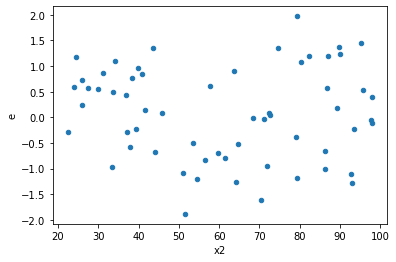

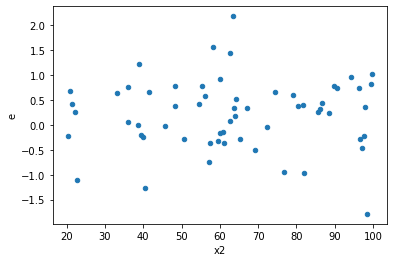

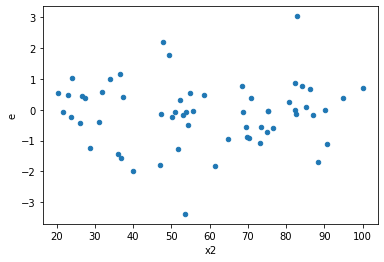

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,27.0,27.0,25.590070279918553,37.49943752746499,0.9477803807377242,1.3888680565727773,1.4653901735038275,0.32674414922195694,0.8366279253890215,0.16337207461097847,Reject001=1 : Homoscedasticity
2.0,18.0,36.0,19.382292903896,39.37058327159207,1.0767940502164446,1.0936273130997796,1.0156327599320885,0.9336308087988376,0.5331845956005812,0.4668154043994188,Reject001=1 : Homoscedasticity
3.0,29.0,25.0,34.83133269752416,39.153527562703296,1.2010804378456608,1.5661411025081318,1.303943560447349,0.5038138198805706,0.7480930900597147,0.2519069099402853,Reject001=1 : Homoscedasticity
4.0,28.0,26.0,24.4303622564059,28.943248082412573,0.8725129377287821,1.1132018493235605,1.2758571262236065,0.535129006160175,0.7324354969199125,0.2675645030800875,Reject001=1 : Homoscedasticity
8.0,35.0,19.0,17.2537362287793,9.780221027152278,0.49296389225083714,0.5147484751132778,1.0441910314424325,0.9473628252378581,0.526318587381071,0.47368141261892904,Reject001=1 : Homoscedasticity
9.0,33.0,21.0,32.56658523511659,24.527831396663828,0.9868662192459573,1.167991971269706,1.1835362772495577,0.696105938168825,0.6519470309155875,0.3480529690844125,Reject001=1 : Homoscedasticity
10.0,22.0,32.0,20.704043144774715,30.344217415653624,0.9410928702170325,0.9482567942391757,1.0076123454431136,0.9653083614988816,0.5173458192505592,0.4826541807494408,Reject001=1 : Homoscedasticity
16.0,25.0,29.0,17.113146275664317,28.463116935103713,0.6845258510265727,0.9814867908656453,1.4338199052581067,0.349165233277424,0.825417383361288,0.174582616638712,Reject001=1 : Homoscedasticity
17.0,31.0,23.0,20.0698331277341,23.835751815001117,0.6474139718623904,1.0363370354348311,1.6007331946415075,0.2462588976771649,0.8768705511614175,0.12312944883858246,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,27.0,27.0,25.590070279918553,37.49943752746499,0.9477803807377242,1.3888680565727773,1.4653901735038275,0.32674414922195694,Reject001=1 : Homoscedasticity
1.0,26.0,28.0,26.395181336515908,27.86478451219898,1.0151992821736888,0.9951708754356778,0.9802714530144986,0.9629363561831551,Reject001=1 : Homoscedasticity
2.0,18.0,36.0,19.382292903896,39.37058327159207,1.0767940502164446,1.0936273130997796,1.0156327599320885,0.9336308087988376,Reject001=1 : Homoscedasticity
3.0,29.0,25.0,34.83133269752416,39.153527562703296,1.2010804378456608,1.5661411025081318,1.303943560447349,0.5038138198805706,Reject001=1 : Homoscedasticity
4.0,28.0,26.0,24.4303622564059,28.943248082412573,0.8725129377287821,1.1132018493235605,1.2758571262236065,0.535129006160175,Reject001=1 : Homoscedasticity
5.0,30.0,24.0,25.77848017386199,14.729571173825455,0.8592826724620664,0.6137321322427273,0.7142377612296388,0.37958174936883476,Reject001=1 : Homoscedasticity
6.0,26.0,28.0,18.244504184990866,16.34773497694028,0.7017116994227256,0.5838476777478672,0.8320335519960389,0.6402357241045242,Reject001=1 : Homoscedasticity
7.0,25.0,29.0,21.774982129881085,17.59891884338379,0.8709992851952434,0.60685927046151,0.6967391142295557,0.3620512065164925,Reject001=1 : Homoscedasticity
8.0,35.0,19.0,17.2537362287793,9.780221027152278,0.49296389225083714,0.5147484751132778,1.0441910314424325,0.9473628252378581,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      982
Reject001=0 : Heteroscedasticity     18
Name: Result_test, dtype: int64